# Hierarchical clustering

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs# hace set de datos 
from sklearn.cluster import AgglomerativeClustering # libreria para aplicar hierarchical clustering
from sklearn.metrics import silhouette_score # para medir el performance del modelo 
from scipy.cluster.hierarchy import dendrogram, linkage # libreria para generar la grafica del dendograma 

## Preparando datos de prueba

In [41]:
X,y, c = make_blobs(500, #Genera 500 datos
                    cluster_std=0.8,#que tan agrepados van a estar los closters
                    centers=4,#centros generados
                    n_features=2,#dimensiones del cluster
                    return_centers=True#retorno de centroide
                    )
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y,
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

## Visualización de datos

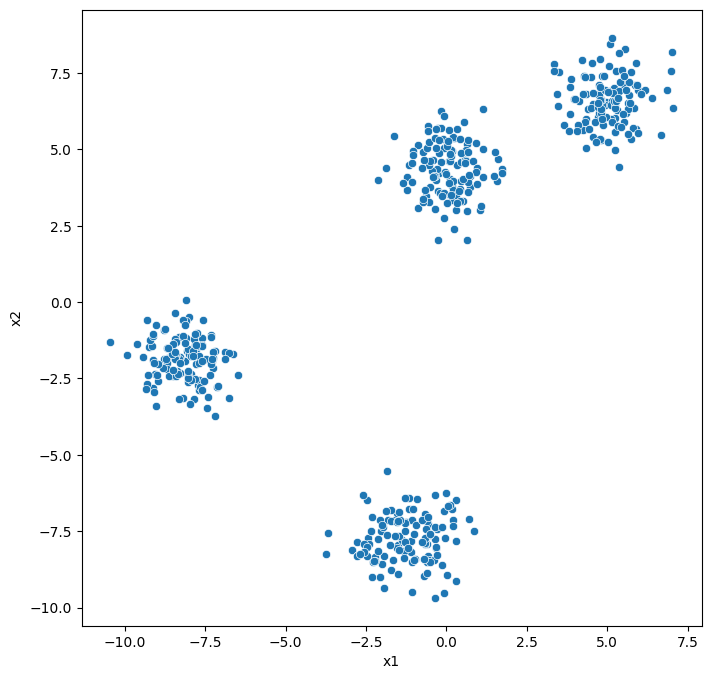

In [42]:
fig = plt.figure(figsize=(8,8))

sns.scatterplot(data=df_blobs, x='x1',y='x2')
plt.show()

## Dendrograma y hierarchical clustering

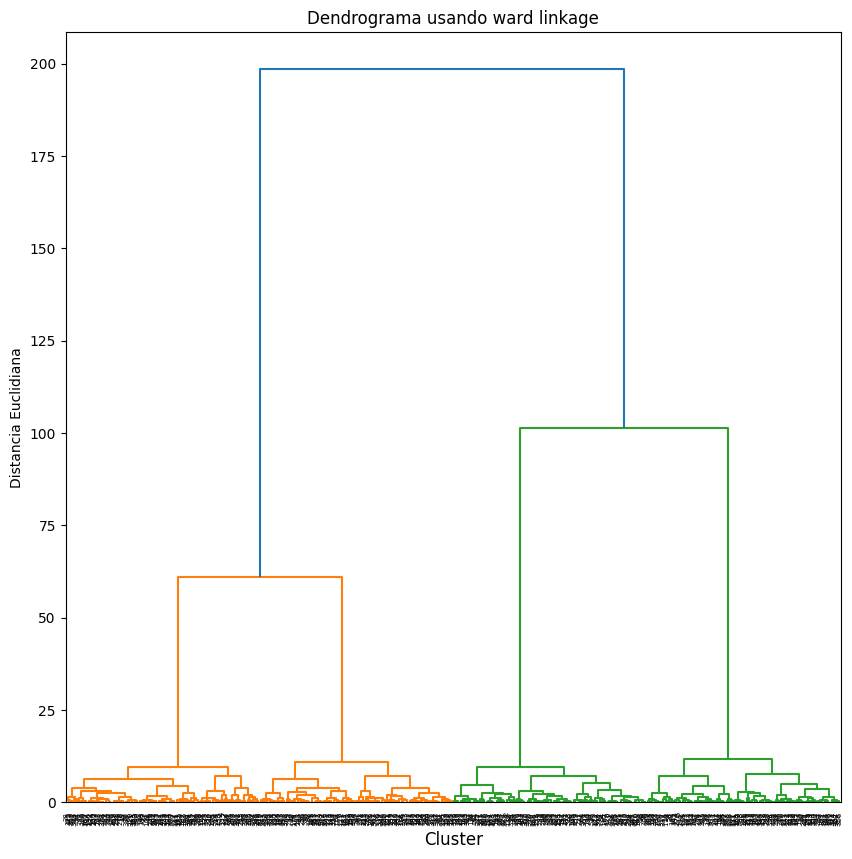

In [43]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(X,method='ward'))
plt.title('Dendrograma usando ward linkage')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distancia Euclidiana')
plt.show()

viendo el dendograma se puede ver que podemos tomar 4 clusters, como sabemos esto, dependiendo de las lineas que tenemos en la parte medio inferior del grafico 

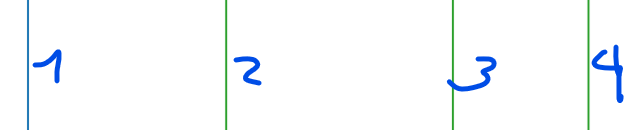

podemos ver que tienen una buena distancia entre si por eso las consideramos 

podrian ser 3 o 2 clusters 

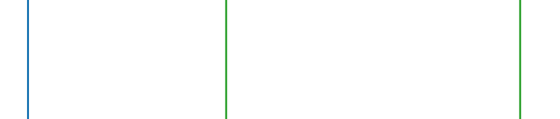

no pueden ser mas de 4

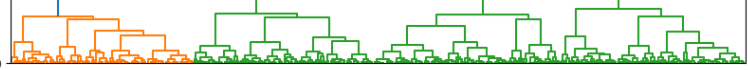

pero con 4 se nota una buena distancia entre si

In [44]:
# Creamos un objeto AgglomerativeClustering con 4 clusters
# La función AgglomerativeClustering crea un objeto que realizará el clustering jerárquico aglomerativo.
# El parámetro n_clusters especifica el número de clusters que queremos obtener, en este caso, 4.
# El parámetro affinity determina la métrica de distancia que se utilizará para calcular la similitud entre las muestras. En este caso, es 'euclidean', lo que significa que se usará la distancia euclidiana.
# El parámetro linkage determina el criterio para calcular la distancia entre los nuevos clusters que se van formando durante el proceso de aglomeración. En este caso, es 'ward', lo que significa que se utilizará el método de enlace de Ward.
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# Utilizamos el método fit_predict del objeto AgglomerativeClustering para realizar el clustering y asignar las etiquetas a cada muestra
# La función fit_predict realiza el clustering jerárquico aglomerativo en los datos proporcionados (X) y devuelve las etiquetas de los clusters a los que pertenece cada muestra.
# X es el conjunto de datos en el que se realizará el clustering.
y_hc = hc.fit_predict(X)

# Imprimimos las etiquetas de los clusters asignados a cada muestra
print("Etiquetas de los clusters:", y_hc)


Etiquetas de los clusters: [2 0 2 1 3 0 2 2 0 2 0 3 1 2 0 1 3 2 2 3 0 2 3 3 3 2 0 3 3 0 3 3 2 2 2 1 2
 2 1 0 1 2 0 3 3 3 3 1 2 1 1 1 0 0 2 3 0 1 2 2 2 3 0 3 0 2 3 3 3 3 1 3 1 0
 0 2 0 3 3 0 1 3 1 2 0 1 2 1 2 2 2 0 2 0 1 3 1 2 2 0 0 3 0 0 0 2 2 0 1 1 2
 1 3 2 0 0 1 0 1 3 3 1 1 0 3 1 0 3 2 2 3 1 0 3 1 2 0 2 2 2 3 0 2 2 1 0 1 2
 3 0 3 2 1 0 1 3 3 2 1 1 3 3 0 3 2 0 1 2 2 3 0 0 1 2 2 3 3 3 1 0 3 0 1 1 1
 3 0 2 3 3 0 1 0 2 3 3 3 1 2 0 3 1 2 3 0 3 1 0 3 0 0 0 2 1 1 3 3 0 1 1 2 2
 2 1 3 2 1 0 3 1 1 1 3 3 0 0 2 0 0 3 3 2 0 1 1 2 3 0 3 2 0 1 3 1 1 2 1 1 2
 1 0 0 0 2 0 1 1 2 3 2 0 1 2 0 1 2 3 2 1 0 0 2 3 1 1 1 0 1 2 2 0 2 1 1 0 2
 0 3 2 1 0 2 1 3 2 3 2 2 2 1 1 3 0 3 1 1 0 3 0 1 1 0 2 1 3 3 2 1 2 0 1 0 3
 1 0 2 1 0 3 1 1 2 1 0 0 1 2 1 3 1 3 2 0 1 0 2 0 3 2 3 3 1 0 0 2 0 2 1 2 2
 2 1 3 0 0 0 1 0 2 3 2 2 1 3 1 3 0 3 3 0 2 0 1 0 0 3 0 1 2 2 2 2 2 3 0 3 3
 2 0 3 2 1 1 1 0 1 1 2 0 0 2 0 1 2 3 3 2 2 0 0 2 1 0 3 3 1 0 1 1 1 0 0 3 0
 0 1 1 0 3 1 3 2 0 1 3 3 1 2 0 3 3 0 3 2 3 0 3 2 1 3 1 3 3 1 3 2 3 3 3 2 

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [45]:

df_blobs['cluster'] = y_hc

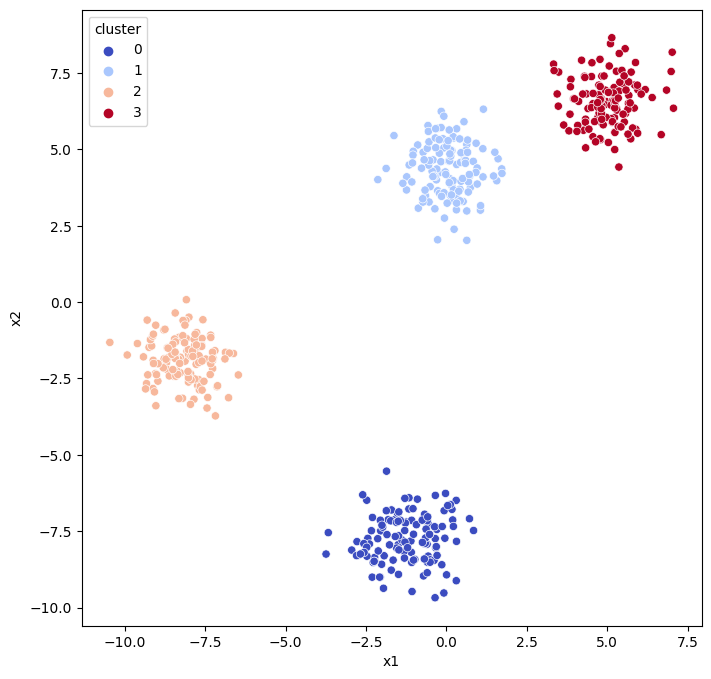

In [46]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2', hue='cluster', palette='coolwarm')
plt.show()

## Evaluación de hierarchical clustering

In [47]:
silhouette_score(X,y_hc)

0.794582113665155

codigo proporcionado por sklearn para ver la grafica de silueta y su distribucion con hirechical ya que el original es con kmean 

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



For n_clusters = 3 The average silhouette_score is : 0.7804639854749337
For n_clusters = 4 The average silhouette_score is : 0.794582113665155
For n_clusters = 5 The average silhouette_score is : 0.668367347114474


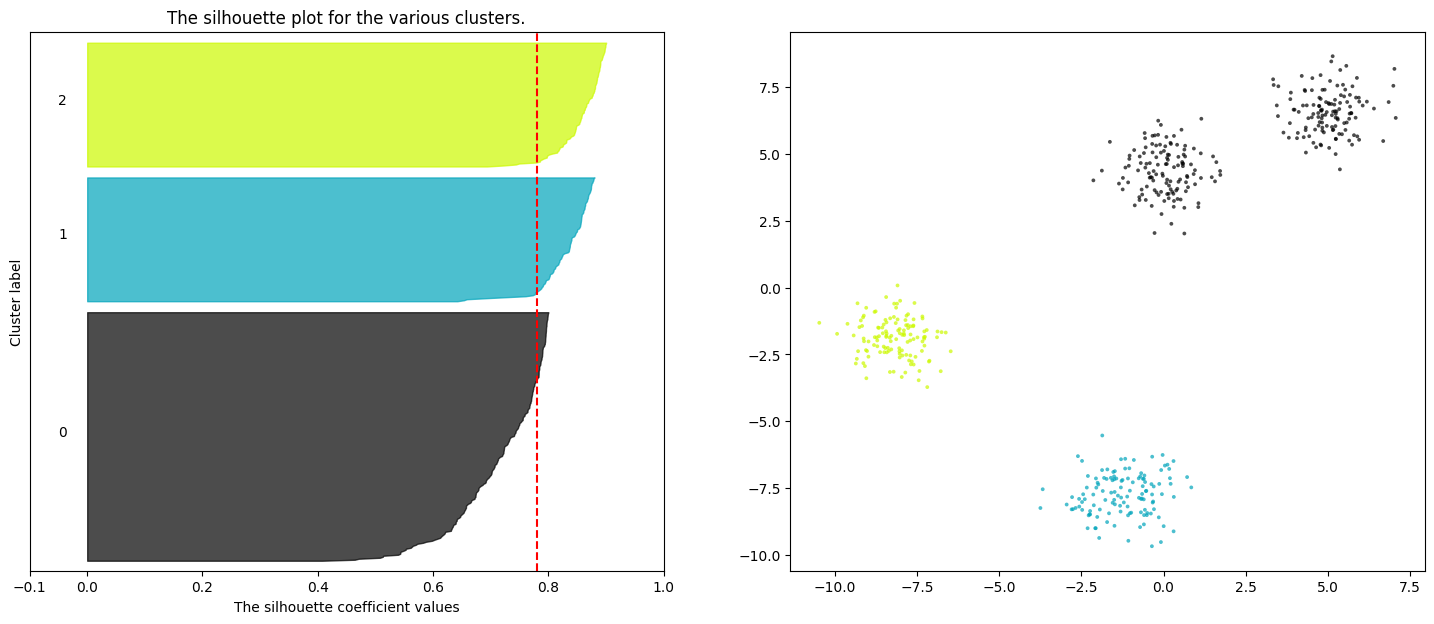

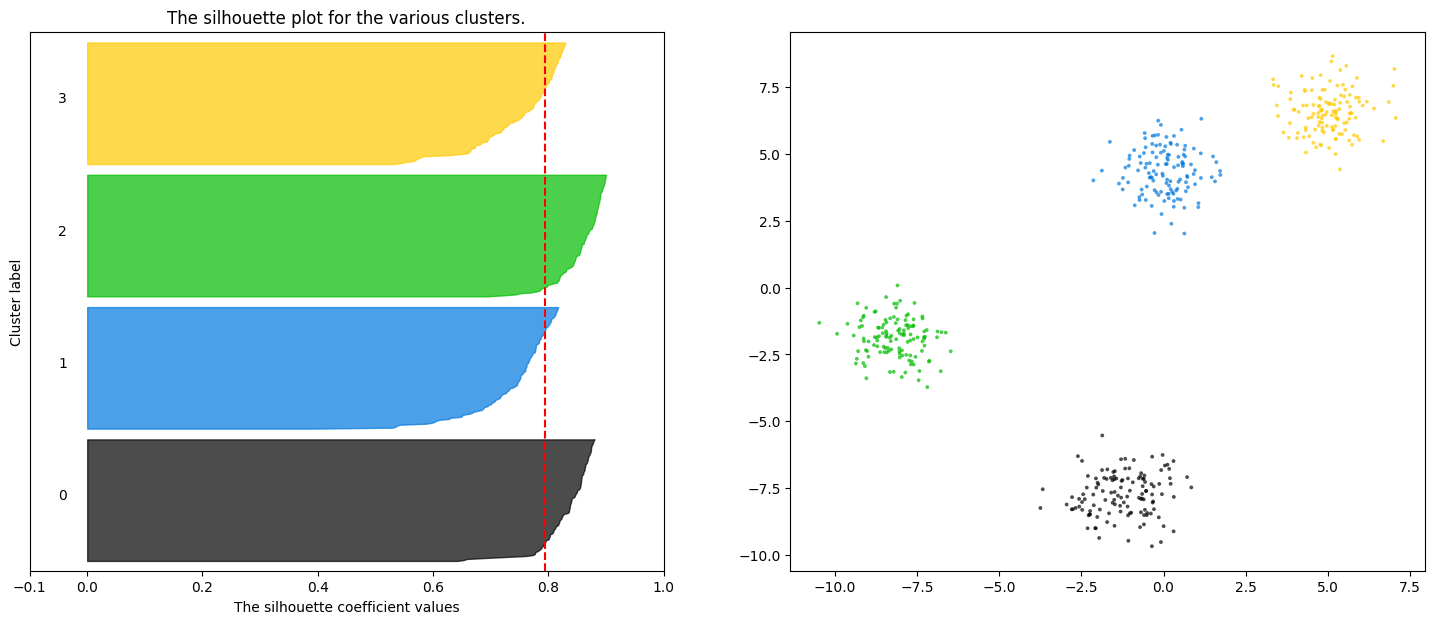

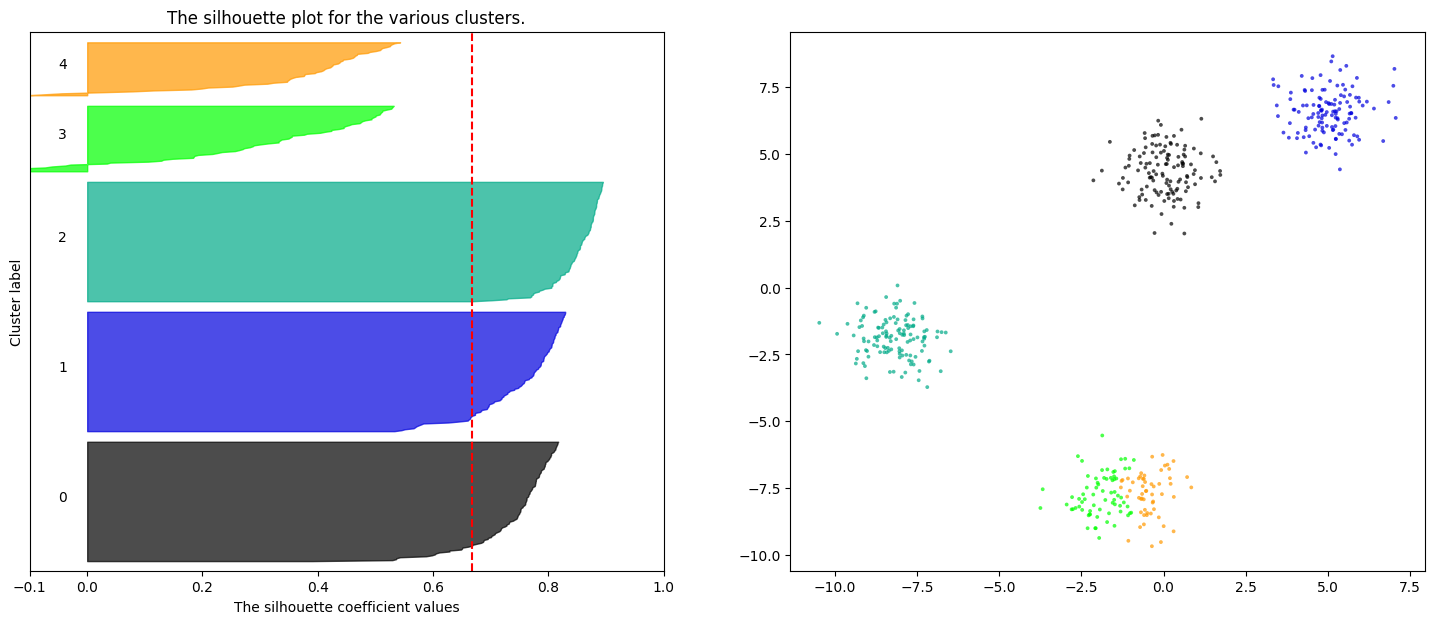

In [48]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    
plt.show()

range_n_clusters = [3,4,5] puedes generar graficas con los clusters que quieras en el mismo codigo 

## Lo mismo pero con plotly
https://chart-studio.plotly.com/~Diksha_Gabha/2853.embed
errores solucionados que no permitian vizualisar algunas funciones 

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

figures = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = make_subplots(rows=1, cols=2,
                        print_grid=False,
                        subplot_titles=('The silhouette plot for the various clusters.',
                                              'The visualization of the clustered data.'))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    fig['layout']['xaxis1'].update(title='The silhouette coefficient values',
                                   range=[-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    fig['layout']['yaxis1'].update(title='Cluster label',
                                   showticklabels=False,
                                   range=[0, len(X) + (n_clusters + 1) * 10])



    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    color = []

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i


        colors = matplotlib.colors.colorConverter.to_rgb(cm.nipy_spectral(float(i) / n_clusters))
        colors = 'rgb'+str(colors)
        color.append(colors)
        filled_area = go.Scatter(y=np.arange(y_lower, y_upper),
                                 x=ith_cluster_silhouette_values,
                                 mode='lines',
                                 showlegend=False,
                                 line=dict(width=0.5,
                                          color=colors),
                                 fill='tozerox',
                                 name='Silhouette')
        fig.add_traces(filled_area, 1, 1)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


    # The vertical line for average silhouette score of all the values
    axis_line = go.Scatter(x=[silhouette_avg, silhouette_avg],
                           y=[0, y_upper],
                           showlegend=False,
                           mode='lines',
                           line=dict(color="red", dash='dash',
                                     width =2) )


    fig.append_trace(axis_line, 1, 1)


    # 2nd Plot showing the actual clusters formed
    clusters = go.Scatter(x=X[:, 0], 
                          y=X[:, 1], 
                          showlegend=False,
                          mode='markers',
                          marker=dict(color=cluster_labels,
                                     size=4, colorscale=color),
                          name='Data'
                         )
    fig.append_trace(clusters, 1, 2)

#         # Labeling the clusters
#         centers_ = clusterer.cluster_centers_
#         # Draw white circles at cluster centers
#         centers = go.Scatter(x=centers_[:, 0], 
#                              y=centers_[:, 1],
#                              showlegend=False,
#                              mode='markers',
#                              marker=dict(color='green', size=10,
#                                          line=dict(color='black',
#                                                                  width=1))
#                             )

#     fig.append_trace(centers, 1, 2)

    fig['layout']['xaxis2'].update(title='Feature space for the 1st feature',
                                   zeroline=False)
    fig['layout']['yaxis2'].update(title='Feature space for the 2nd feature',
                                  zeroline=False)


    fig['layout'].update(title="Silhouette analysis for KMeans clustering on sample data "
                         "with n_clusters = %d" % n_clusters)

    fig.update_layout(showlegend=True)
    figures.append(fig)
    fig.show()

For n_clusters = 2 The average silhouette_score is : 0.6694432476835734


For n_clusters = 3 The average silhouette_score is : 0.7804639854749337


For n_clusters = 4 The average silhouette_score is : 0.794582113665155


For n_clusters = 5 The average silhouette_score is : 0.668367347114474


For n_clusters = 6 The average silhouette_score is : 0.5694321734011608
